## Task 2 Exploratory Data Analysis

In [3]:
import numpy as np

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # optional for interactive plots


In [5]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mukeshsunku","key":"0ba85e306b541aa18a7549b3a596f382"}'}

In [6]:
# Create the Kaggle folder and move the json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d yasserh/titanic-dataset

# Unzip the file
!unzip titanic-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 75.8MB/s]
Archive:  titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


## Load and Prepare the dataset

In [7]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.drop(columns=['PassengerId', 'Ticket', 'Cabin'], inplace=True) # Drop unneeded columns for EDA

In [9]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1630715454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1630715454.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


### summary statistics (mean, median, std, etc.).


In [20]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Histograms & Boxplots (Univariate Analysis)
 Identify patterns, trends, or anomalies in the data

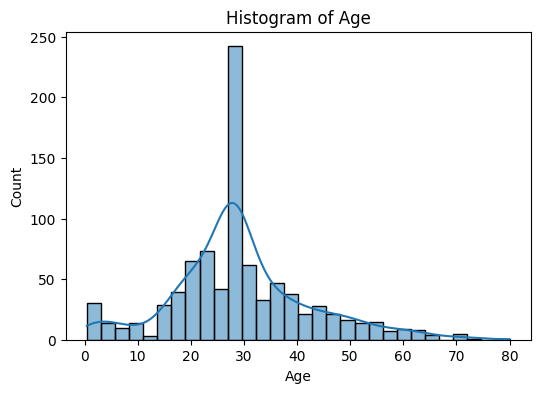

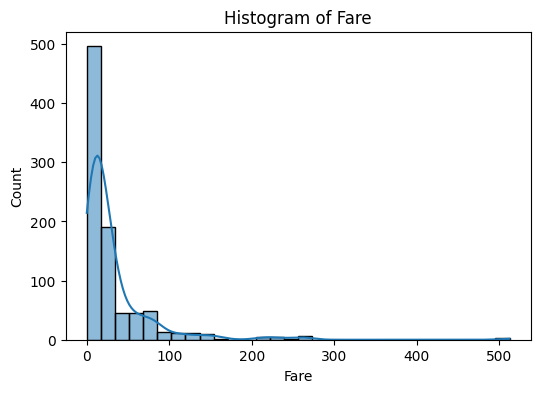

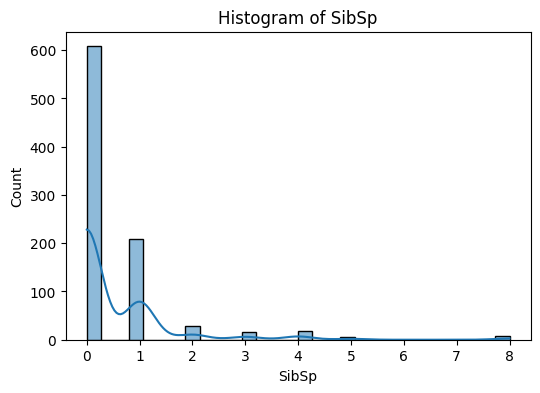

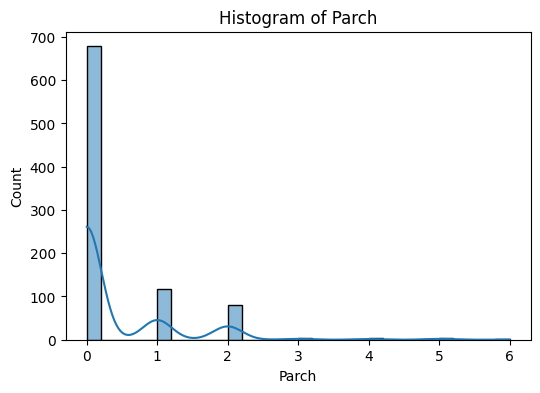

In [11]:
# Histograms
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()

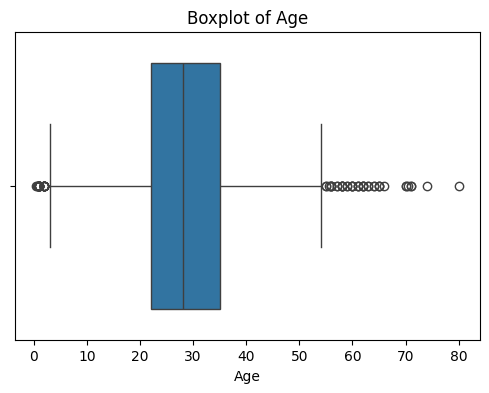

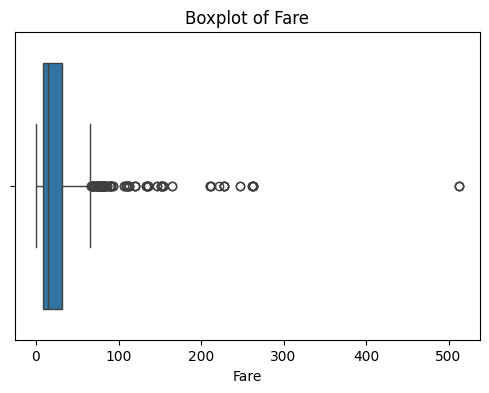

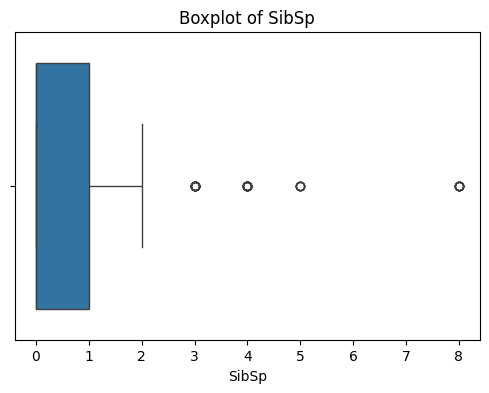

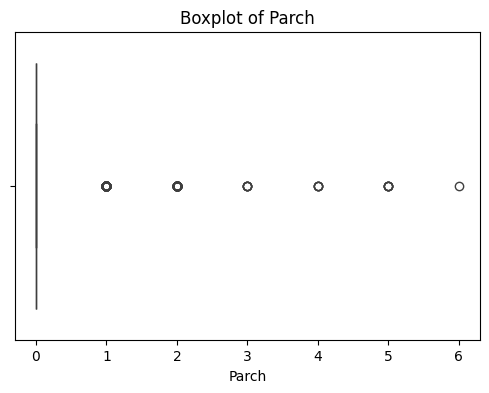

In [12]:
# Boxplots
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## Feature Relationships (Bivariate Analysis)



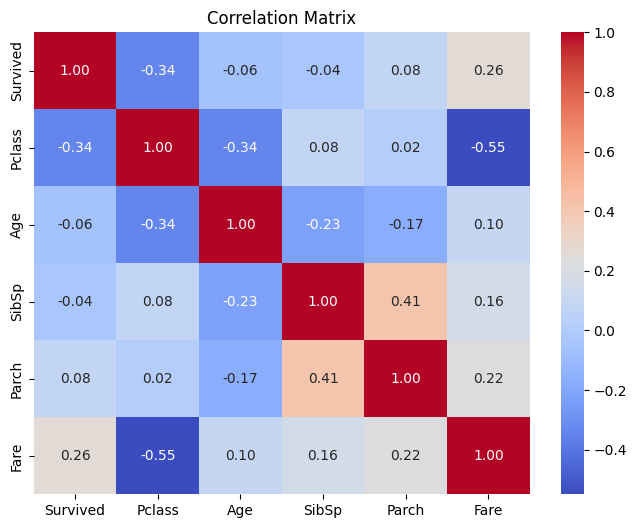

In [16]:

plt.figure(figsize=(8, 6))

# Only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

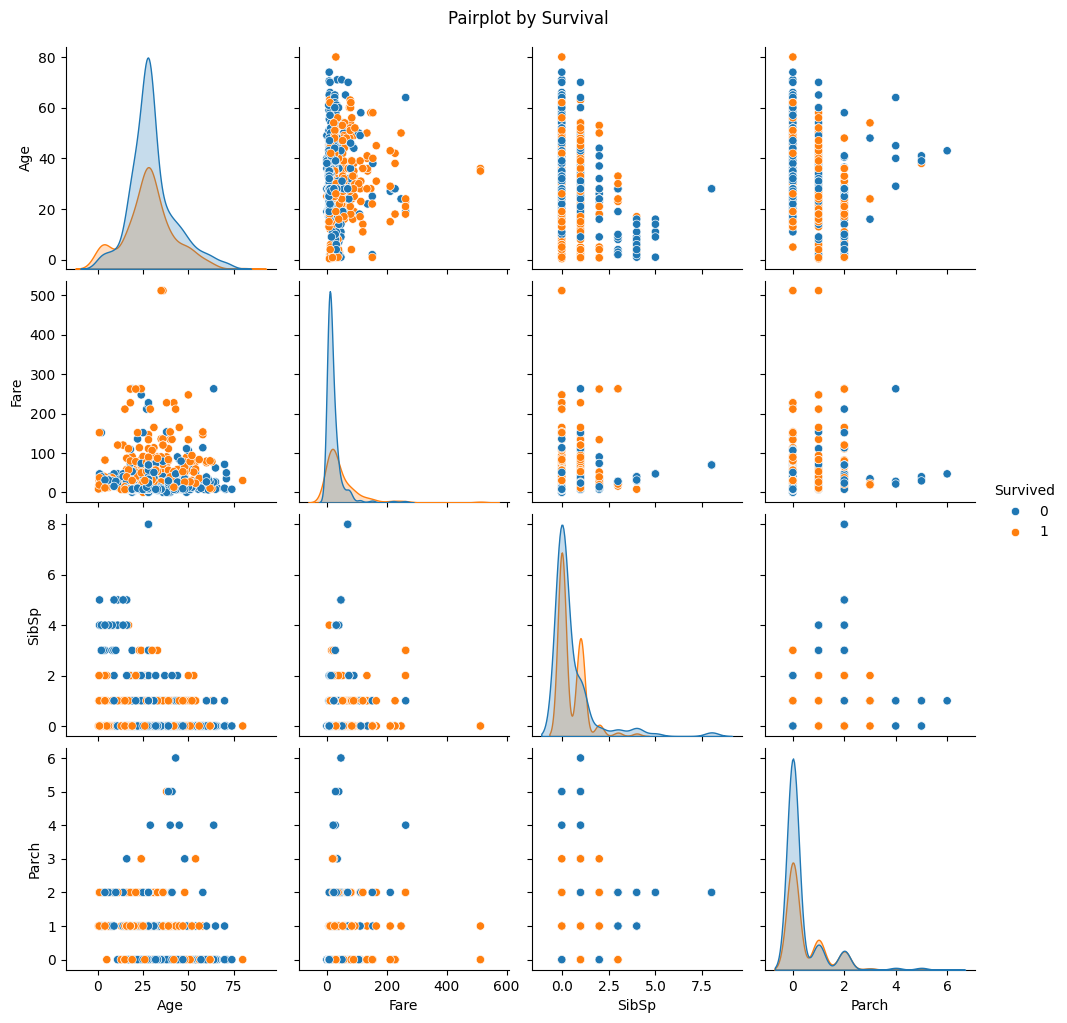

In [17]:
# Pairplot
sns.pairplot(df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle("Pairplot by Survival", y=1.02)
plt.show()

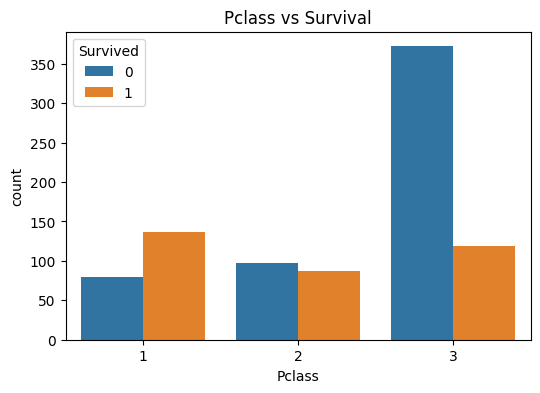

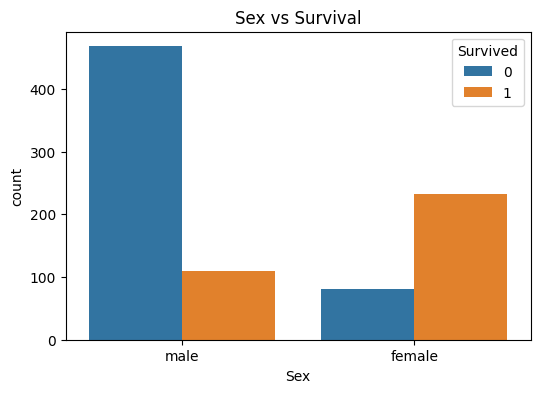

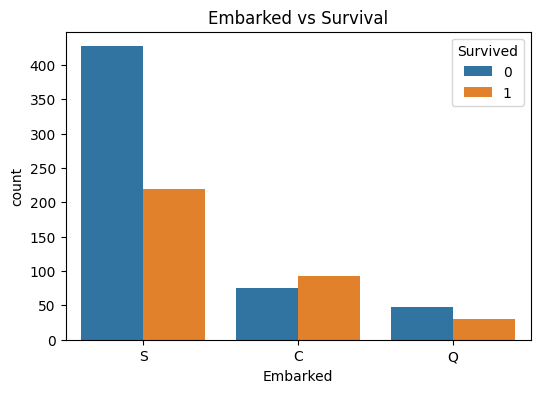

In [18]:
# 🔸 Categorical Features vs Survived

# Count plots
categorical_cols = ['Pclass', 'Sex', 'Embarked']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f'{col} vs Survival')
    plt.show()

## Interactive Plot with Plotly

In [19]:
fig = px.histogram(df, x='Age', color='Survived', nbins=30, title='Age Distribution by Survival')
fig.show()


 ### Insights & Inferences (Examples)
These based on plots:

Age Distribution: Most passengers were between 20–40 years old.

Fare: Survivors generally paid higher fares.

Sex: Females had a significantly higher survival rate.

Pclass: 1st class passengers survived more than 2nd or 3rd.

Embarked: Passengers from port C had slightly higher survival.